In [40]:
# import libraries
import numpy as np
from astropy.io import fits
import matplotlib.pylab as plt

In [41]:
# The following code shows how we can open a FITS file and print out its header information:

hdulist = fits.open('./dataset/images/600-CCDA-20181224202102.fits')
hdulist.info()

Filename: ./dataset/images/600-CCDA-20181224202102.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      24   (3352, 2532)   int16 (rescales to uint16)   


In [43]:
# HDU (Header/Data Unit) list
# The header contains metadata about the HDU object, e.g. its dimensions and data type. Every HDU can contain image data. The first HDU is called the primary HDU.
# The image data can be accessed using the data attribute:

hdulist = fits.open('./dataset/images/600-CCDA-20181224202102.fits')
data = hdulist[0].data

print(data.shape)

(2532, 3352)


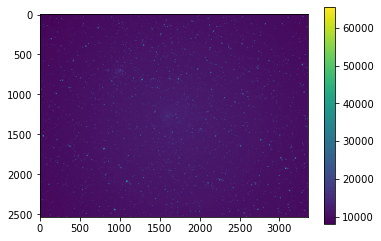

In [44]:
#2D plot of image data
plt.imshow(data, cmap=plt.cm.viridis)
plt.colorbar()
plt.show()

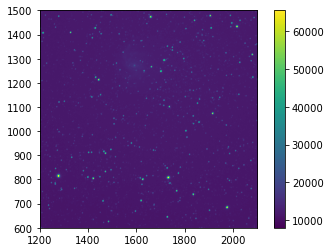

In [48]:
#2D plot of image data, zoom in center of image
plt.imshow(data, cmap=plt.cm.viridis)
plt.colorbar()
plt.xlim(1200,2100)
plt.ylim(600,1500)
plt.show()

In [56]:
# Finds the position of the brightest pixel (i.e. the maximum value) in its image data. 
# To find the brightest pixel of the image we are looking for the largest value in the 2D array. The argmax function from numpy provides precisely this functionality
#  it searches for the largest value in the array and returns its position. 
# However, if you've printed out the result of argmax on its own you would have found that it does not return a tuple of x and y coordinates but just a single index. 
# This function works on a flattened (or ravelled) array, i.e. the array gets converted to a 1D array internally before the maximum is found. 
# To revert this, or to "unravel" the result, we can call the function unravel_index and pass it the dimension of the initial data array as second argument.

def load_fits(filename):
  hdulist = fits.open(filename)
  data = hdulist[0].data

  arg_max = np.argmax(data)  
  max_pos = np.unravel_index(arg_max, data.shape)
  
  return max_pos

In [57]:
bright = load_fits('./dataset/images/600-CCDA-20181224202102.fits')
print(bright)

(10, 604)
